In [1]:
# automatically reload edited modules
%load_ext autoreload
%autoreload 2
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
#from keras.application import MobileNet
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
from scipy import io

In [2]:
def build_landmark_model(input_shape, output_size):
    """Build the convolutional network model with Keras Functional API.
    Args:
        input_shape: the shape of the input image, without batch size.
        output_size: the number of output node, usually equals to the number of
            marks times 2 (in 2d space).
    Returns:
        a Keras model, not compiled.
    """

    # The model is composed of multiple layers.

    # Convolutional layers.
    conv_1 = keras.layers.Conv2D(filters=32,
                                 kernel_size=(3, 3),
                                 activation='relu')
    conv_2 = keras.layers.Conv2D(filters=64,
                                 kernel_size=(3, 3),
                                 strides=(1, 1),
                                 padding='valid',
                                 activation='relu')
    conv_3 = keras.layers.Conv2D(filters=64,
                                 kernel_size=(3, 3),
                                 strides=(1, 1),
                                 padding='valid',
                                 activation='relu')
    conv_4 = keras.layers.Conv2D(filters=64,
                                 kernel_size=(3, 3),
                                 strides=(1, 1),
                                 padding='valid',
                                 activation='relu')
    conv_5 = keras.layers.Conv2D(filters=64,
                                 kernel_size=[3, 3],
                                 strides=(1, 1),
                                 padding='valid',
                                 activation='relu')
    conv_6 = keras.layers.Conv2D(filters=128,
                                 kernel_size=(3, 3),
                                 strides=(1, 1),
                                 padding='valid',
                                 activation='relu')
    conv_7 = keras.layers.Conv2D(filters=128,
                                 kernel_size=[3, 3],
                                 strides=(1, 1),
                                 padding='valid',
                                 activation='relu')
    conv_8 = keras.layers.Conv2D(filters=256,
                                 kernel_size=[3, 3],
                                 strides=(1, 1),
                                 padding='valid',
                                 activation='relu')

    # Pooling layers.
    pool_1 = keras.layers.MaxPool2D(pool_size=(2, 2),
                                    strides=(2, 2),
                                    padding='valid')
    pool_2 = keras.layers.MaxPool2D(pool_size=(2, 2),
                                    strides=(2, 2),
                                    padding='valid')
    pool_3 = keras.layers.MaxPool2D(pool_size=(2, 2),
                                    strides=(2, 2),
                                    padding='valid')
    pool_4 = keras.layers.MaxPool2D(pool_size=[2, 2],
                                    strides=(1, 1),
                                    padding='valid')

    # Dense layers.
    dense_1 = keras.layers.Dense(units=1000,
                                 activation='relu',
                                 use_bias=True)
    dense_2 = keras.layers.Dense(units=output_size,
                                 activation=None,
                                 use_bias=True)
    
    # Batch norm layers
    bn_1 = keras.layers.BatchNormalization()
    bn_2 = keras.layers.BatchNormalization()
    bn_3 = keras.layers.BatchNormalization()
    bn_4 = keras.layers.BatchNormalization()
    bn_5 = keras.layers.BatchNormalization()
    bn_6 = keras.layers.BatchNormalization()
    bn_7 = keras.layers.BatchNormalization()
    bn_8 = keras.layers.BatchNormalization()
    bn_9 = keras.layers.BatchNormalization()


    # Flatten layers.
    flatten_1 = keras.layers.Flatten()

    # All layers got. Define the forward propgation.
    inputs = keras.Input(shape=input_shape, name="image_input")

    # |== Layer 1 ==|
    x = conv_1(inputs)
    x = bn_1(x)
    x = pool_1(x)

    # |== Layer 2 ==|
    x = conv_2(x)
    x = bn_2(x)
    x = conv_3(x)
    x = bn_3(x)
    x = pool_2(x)

    # |== Layer 3 ==|
    x = conv_4(x)
    x = bn_4(x)
    x = conv_5(x)
    x = bn_5(x)
    x = pool_3(x)

    # |== Layer 4 ==|
    x = conv_6(x)
    x = bn_6(x)
    x = conv_7(x)
    x = bn_7(x)
    x = pool_4(x)

    # |== Layer 5 ==|
    x = conv_8(x)
    x = bn_8(x)

    # |== Layer 6 ==|
    x = flatten_1(x)
    x = dense_1(x)
    x = bn_9(x)
    outputs = dense_2(x)

    # Return the model
    return keras.Model(inputs=inputs, outputs=outputs, name="landmark")

In [3]:
model = build_landmark_model(input_shape = (128, 128, 3), output_size = 70*2)
#model = keras.models.load_model('saved_model')
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.01 ))
model.summary()

Model: "landmark"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        369

1699 425
(32, 128, 128, 3)


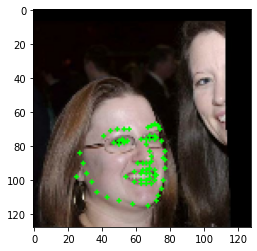

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.04267842, 0.03511101, 0.05471886],
        [0.0453125 , 0.02570466, 0.04923407],
        [0.03936888, 0

In [4]:
split_rate = 0.9
batch_size = 32
data_dir = '../DATA_SET/300W-LP/300W_LP/AFW/'
landmark_dir = '../DATA_SET/300W-LP/300W_LP/landmarks/AFW/'
new_landmark_dir = 'new_data/new_landmark/'

# file_list = glob.glob(data_dir+'/*_1_0.jpg')
# name_list = list(set(map(lambda x : os.path.split(x)[-1][:-4], file_list)))
    
# file_list = os.listdir(data_dir)
# name_list = list(set(map(lambda x : x[:-4], file_list)))

file_list = os.listdir(new_landmark_dir)
name_list = list(set(map(lambda x : x[4:-8], file_list)))

train_len = int(len(name_list)*0.8)
test_len = len(name_list)-train_len
print(train_len, test_len)

train_dataset = tf.data.Dataset.from_tensor_slices(name_list[:train_len])
test_dataset = tf.data.Dataset.from_tensor_slices(name_list[train_len:])

def _read_mat(file_path):
    matfile = io.loadmat(file_path)
    #label = ((matfile['pts_2d']-225.)/225.).astype(np.float32)
    label = ((matfile['landmark']-225.)/225.).astype(np.float32)
    return label

def process_path(name):
    image_path = data_dir+name+'.jpg'
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    label = tf.numpy_function(_read_mat, [new_landmark_dir+'new_'+name+'_pts.mat'], tf.float32)
    image, label = tf.numpy_function(_shift_image_one, [image, label], [tf.float32, tf.float32])
    
    image = tf.reshape(image, shape=[128, 128, 3])
    label = tf.reshape(label, shape=[-1])
    
    return image, label

def _shift_image_one(img, label):
    img_h, img_w, img_c = img.shape
    label_p, _ = label.shape
    
    s_img = np.zeros_like(img, dtype=np.float32)
    s_label = np.expand_dims(label, axis=0)
    
    label_x_info = np.array([min(label[:,0]), max(label[:,0])])* img_w/2 + img_w/2
    label_y_info = np.array([min(label[:,1]), max(label[:,1])])* img_h/2 + img_h/2
    
    label_x_info = label_x_info.astype(np.int)
    label_y_info = label_y_info.astype(np.int)
    
    
    shift_x = np.random.randint(-label_x_info[0], img_w - label_x_info[1])
    shift_y = np.random.randint(-label_y_info[0], img_h - label_y_info[1])
    
    if shift_x < 0:
        get_x = (-shift_x, img_w)
        put_x = (0, img_w + shift_x)
    else:
        get_x = (0, img_w - shift_x)
        put_x = (shift_x, img_w)
    if shift_y < 0:
        get_y = (-shift_y, img_h)
        put_y = (0, img_h + shift_y)
    else:
        get_y = (0, img_h - shift_y)
        put_y = (shift_y, img_h)

    s_img[put_y[0]:put_y[1], put_x[0]:put_x[1], :] = img[get_y[0]:get_y[1], get_x[0]:get_x[1], :]
    s_label = np.append(np.expand_dims(label[:,0] + (shift_x)/(img_w/2), axis = -1),
                          np.expand_dims(label[:,1] + (shift_y)/(img_h/2), axis = -1), axis = 1)
    
    return s_img, s_label

def _shift_image(img, label, num = 5):
    img_h, img_w, img_c = img.shape
    label_p, _ = label.shape
    
    #print(img.shape)
    #label = np.reshape(label, (-1, 2))
    
    s_img = np.append(np.expand_dims(img, axis=0), np.zeros((num, img_w, img_h, img_c), dtype=np.float32), axis = 0)
    s_label = np.expand_dims(label, axis=0)
    
    label_x_info = np.array([min(label[:,0]), max(label[:,0])])* img_w/2 + img_w/2
    label_y_info = np.array([min(label[:,1]), max(label[:,1])])* img_h/2 + img_h/2
    
    label_x_info = label_x_info.astype(np.int)
    label_y_info = label_y_info.astype(np.int)
    
    
    shift_x = np.random.randint(-label_x_info[0], img_w - label_x_info[1], num)
    shift_y = np.random.randint(-label_y_info[0], img_h - label_y_info[1], num)
    
    for i in range(num):
        if shift_x[i] < 0:
            get_x = (-shift_x[i], img_w)
            put_x = (0, img_w + shift_x[i])
        else:
            get_x = (0, img_w - shift_x[i])
            put_x = (shift_x[i], img_w)
        if shift_y[i] < 0:
            get_y = (-shift_y[i], img_h)
            put_y = (0, img_h + shift_y[i])
        else:
            get_y = (0, img_h - shift_y[i])
            put_y = (shift_y[i], img_h)
        
        s_img[i+1, put_y[0]:put_y[1], put_x[0]:put_x[1], :] = img[get_y[0]:get_y[1], get_x[0]:get_x[1], :]
        add_label = np.append(np.expand_dims(label[:,0] + (shift_x[i])/(img_w/2), axis = -1),
                              np.expand_dims(label[:,1] + (shift_y[i])/(img_h/2), axis = -1), axis = 1)
        s_label = np.append(s_label, np.expand_dims(add_label, axis=0), axis = 0)
        #print(type(s_img[0,0,0,0]), type(s_label[0,0,0]))
    return s_img, s_label.reshape(-1, label_p*2)
    

# def tile_crop(img, label):
    
#     flip_img = tf.image.flip_left_right(img)
#     distorted_image_1 = tf.image.random_brightness(img, max_delta=63)
#     distorted_image_2 = tf.image.random_contrast(img, lower=0.2, upper=1.8)
    
#     img_shape = tf.shape(img)
#     crop_left = lambda img: tf.image.random_crop(img[:,:img_shape[1]//2,:], size=[227,227,3])
#     crop_top = lambda img: tf.image.random_crop(img[:img_shape[0]//2,:,:], size=[227,227,3])
#     img = tf.image.random_flip_left_right(img)
#     img = tf.stack([crop_left(img), crop_top(img),...], axis=0])
#     label = tf.reshape(label, [1,1]) #size: (,) -> (1,1)
#     label = tf.tile(label, [5, 1]) #size: (1,1) -> (5,1)
#     return img, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.map(process_path, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.repeat()
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

test_dataset = test_dataset.map(process_path, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.repeat()
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

import cv2
for image_raw, label_text in train_dataset.take(1):
    image = image_raw.numpy()
    print(image.shape)
    for x, y in label_text[0].numpy().reshape(-1, 2):
        image_o = cv2.circle(image[0], (int(x*64+64), int(y*64+64)), 1, (0, 1, 0), -1)
    plt.imshow(image_o)
    plt.show()
    
#     i_t, l_t = _shift_image(image_raw.numpy()[0], label_text[0].numpy().reshape(-1, 2), num = 5)
#     for i, l in zip(i_t, l_t):
#         for x, y in l.reshape(-1, 2):
#             image_o1 = cv2.circle(i, (int(x*64+64), int(y*64+64)), 1, (0, 1, 0), -1)
#         plt.imshow(image_o1)
#         plt.show()
    
    print(repr(image_raw.numpy()[0][:100]))
    print()
    print(label_text[0].numpy())

In [5]:
epochs = 100
train_step = train_len//batch_size
test_step = test_len//batch_size

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=train_step,
                    validation_steps=test_step,
                    validation_data=test_dataset,
                    verbose=1)

Train for 53 steps, validate for 13 steps
Epoch 1/100
53/53 [==============================] - 4s 66ms/step - loss: 0.7540 - val_loss: 2960.8359
Epoch 2/100
53/53 [==============================] - 1s 26ms/step - loss: 0.1008 - val_loss: 1.3207
Epoch 3/100
53/53 [==============================] - 1s 27ms/step - loss: 0.0856 - val_loss: 0.1707
Epoch 4/100
53/53 [==============================] - 1s 27ms/step - loss: 0.0843 - val_loss: 0.1500
Epoch 5/100
53/53 [==============================] - 1s 28ms/step - loss: 0.0864 - val_loss: 0.1476
Epoch 6/100
53/53 [==============================] - 1s 26ms/step - loss: 0.0689 - val_loss: 0.0963
Epoch 7/100
53/53 [==============================] - 1s 26ms/step - loss: 0.0639 - val_loss: 0.0629
Epoch 8/100
53/53 [==============================] - 1s 26ms/step - loss: 0.0529 - val_loss: 0.0770
Epoch 9/100
53/53 [==============================] - 1s 26ms/step - loss: 0.0484 - val_loss: 0.0494
Epoch 10/100
53/53 [==============================] - 1

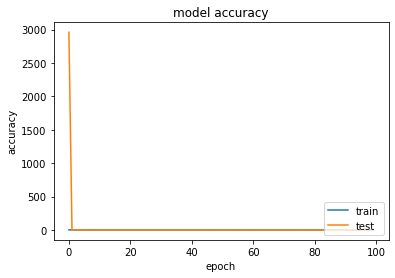

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [9]:
model.save('saved_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/assets


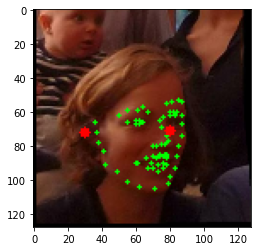

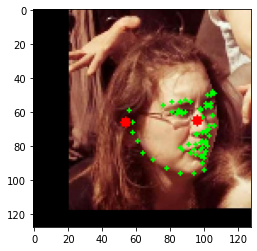

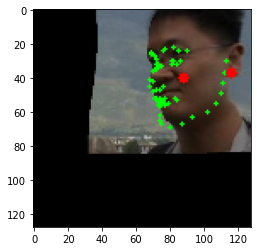

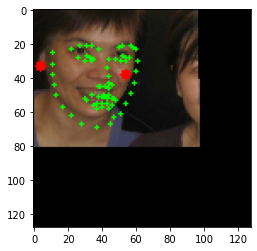

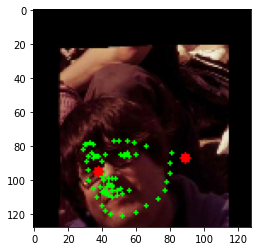

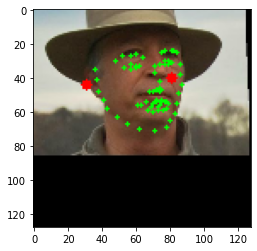

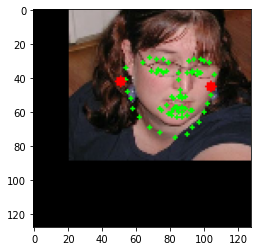

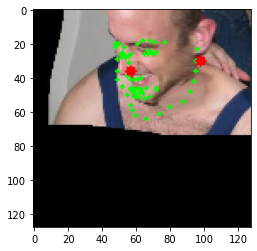

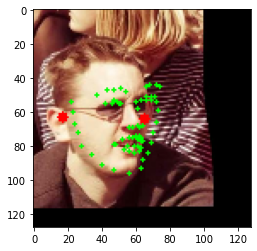

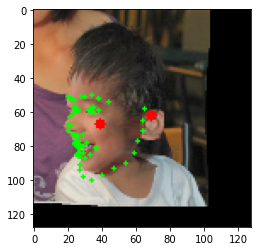

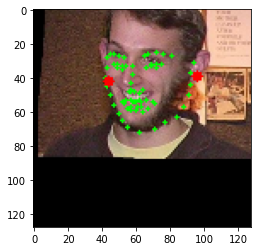

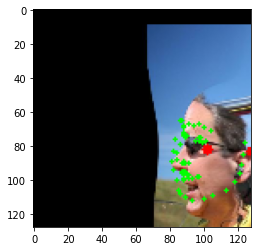

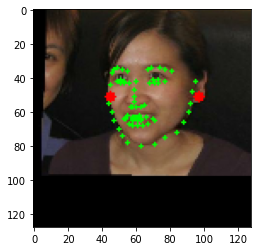

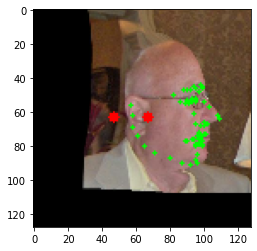

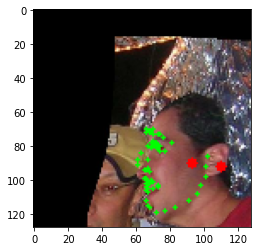

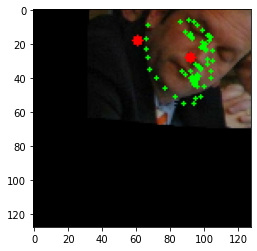

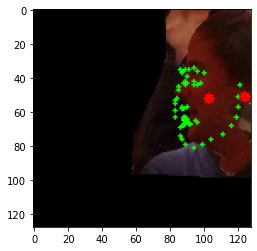

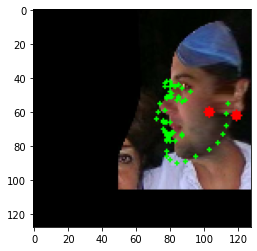

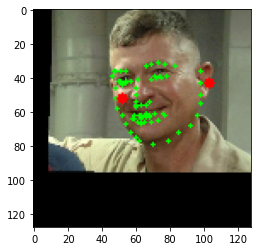

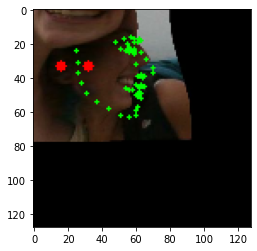

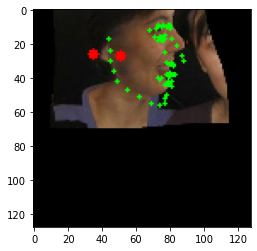

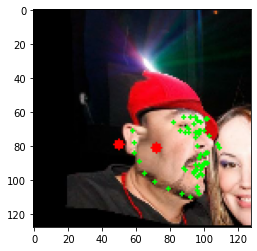

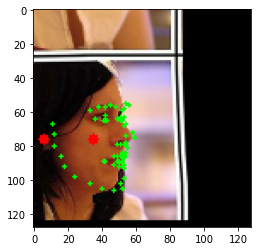

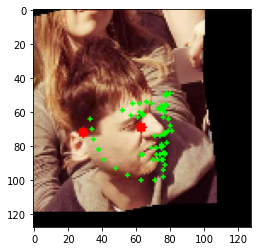

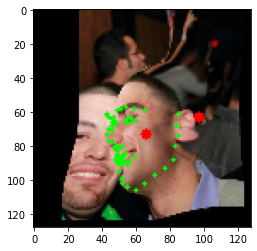

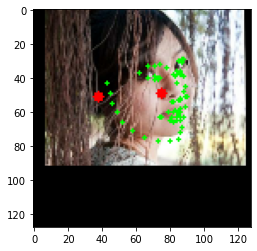

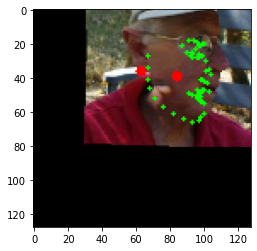

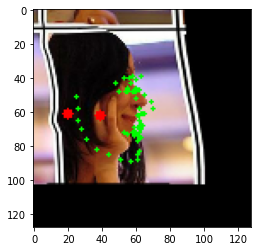

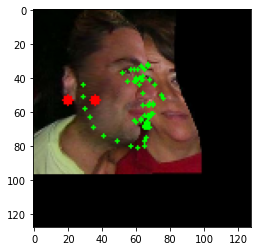

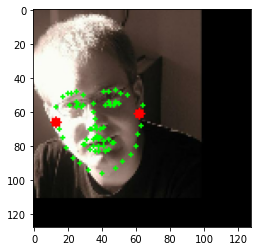

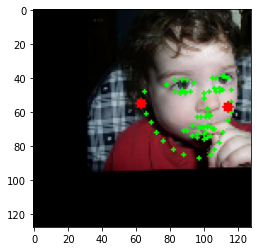

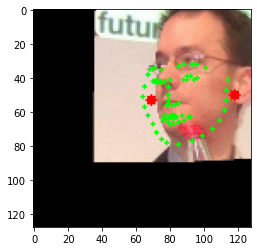

In [8]:
for image_raw, _ in test_dataset.take(1):
    image = image_raw.numpy()
    #print(image)
    result = model.predict(image)
    for i in range(batch_size):
        for x, y in result[i][:-4].reshape(-1, 2):
            img_result = cv2.circle(image[i], (int(x*64+64), int(y*64+64)), 1, (0, 1, 0), -1)
        for x, y in result[i][-4:].reshape(-1, 2):
            img_result = cv2.circle(image[i], (int(x*64+64), int(y*64+64)), 3, (1, 0, 0), -1)
        plt.imshow(img_result)
        plt.show()